In [39]:
import os
import cv2
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image
from matplotlib import pyplot as plt
import random

In [57]:
images=[]
labels=[]
train_dir = './data/uTHCD_a(70-30-split)/70-30-split/train-test-classwise/Train/'
test_dir = './data/uTHCD_a(70-30-split)/70-30-split/train-test-classwise/Test/'
for folders in os.listdir(train_dir):
    for files in os.listdir(train_dir+folders):
        img=cv2.imread(train_dir+folders+'/'+files,0)
        img = np.expand_dims(img,-1)
        img = img.repeat(3,-1)
        images.append(img)
        labels.append(folders)
for folders in os.listdir(test_dir):
    for files in os.listdir(test_dir+folders):
        img=cv2.imread(test_dir+folders+'/'+files,0)
        img = np.expand_dims(img,-1)
        img = img.repeat(3,-1)
        images.append(img)
        labels.append(folders)
images=np.array(images)
labels=np.array(labels) 

In [58]:
len(images)
images[0].shape

(64, 64, 3)

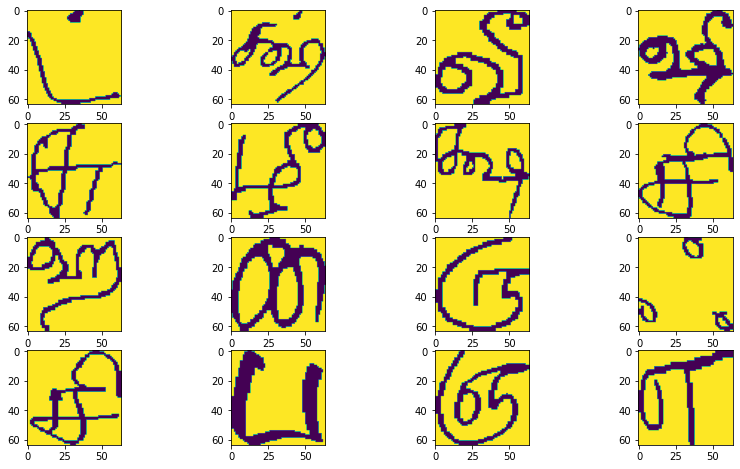

In [5]:
fig = plt.figure(figsize=(14, 8))
row = 4
col = 4

for i in range(row*col):
    fig.add_subplot(row,col,i+1)
    plt.imshow(random.choice(images))

In [66]:
y_labels=to_categorical(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.30, random_state=42)
keras.initializers.lecun_uniform(seed=None)

In [ ]:
print(X_test[0].shape)

In [62]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import *


VGG16_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(64,64,3),
    classes=156,
)

VGG16_model.trainable = False

model = Sequential()
model.add(VGG16_model)
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [63]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(156, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 156)               80028     
                                                                 
Total params: 17,417,692
Trainable params: 2,703,004
Non-trainable params: 14,714,688
_________________________________________________________________


In [72]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)


Epoch 1/5
1990/1990 [==============================] - 1146s 576ms/step - loss: 1.1696 - accuracy: 0.7266 - val_loss: 0.6779 - val_accuracy: 0.8071
Epoch 2/5
1990/1990 [==============================] - 1655s 832ms/step - loss: 0.5456 - accuracy: 0.8433 - val_loss: 0.5906 - val_accuracy: 0.8405
Epoch 3/5
1990/1990 [==============================] - 7381s 4s/step - loss: 0.4729 - accuracy: 0.8654 - val_loss: 0.5940 - val_accuracy: 0.8472
Epoch 4/5
1990/1990 [==============================] - 1198s 602ms/step - loss: 0.4124 - accuracy: 0.8825 - val_loss: 0.5607 - val_accuracy: 0.8605
Epoch 5/5
1990/1990 [==============================] - 1185s 596ms/step - loss: 0.3862 - accuracy: 0.8932 - val_loss: 0.6200 - val_accuracy: 0.8575


In [74]:
scores = model.evaluate(images, y_labels, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

2843/2843 [==============================] - 1126s 396ms/step - loss: 0.4096 - accuracy: 0.8907
CNN Error: 10.93%
